### Problem 1
Consider Ackley Function [link](https://en.wikipedia.org/wiki/Ackley_function) on the interval $[-5; 5] \times [-5; 5]$:
$$f(x,y) = -20\exp\left[-0.2\sqrt{0.5(x^2+y^2)}\right] -\exp\left[0.5(\cos 2\pi x + \cos 2\pi y))\right] + e + 20$$
Find the global minimum value of this function using Simulated Annealing algorithm with Gaussian state change (finding next point by adding Gaussian random values). Plot the progressive steps on the contour map of the function.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x,y):
    res = -20*np.exp(-0.2*np.sqrt((x**2+y**2)/2))
    res -= np.exp(0.5*(np.cos(2*np.pi*x) + np.cos(2*np.pi*y)))
    res += np.exp(1) + 20
    return res

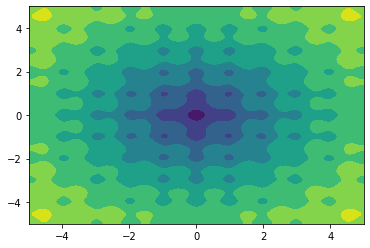

In [3]:
x_min, x_max = -5, 5
y_min, y_max = -5, 5

x_base = np.linspace(x_min, x_max, 100)
y_base = np.linspace(y_min, y_max, 100)

xx, yy = np.meshgrid(x_base, y_base, sparse=True)
z = f(xx, yy)

plt.contourf(x_base, y_base, z)
plt.show()

In [34]:
x0 = np.array([np.random.uniform(x_min, x_max),np.random.uniform(y_min, y_max)])

sigma = 0.5
x1 = x0 + np.random.normal(0, sigma, size=2)

T0 = np.abs(f(x0[0], x0[1])-f(x1[0], x1[1]))/np.log(2)

print(x0, f(x0[0], x0[1]))
print(T0)

[ 4.46288218 -3.63473648] 13.415082314073723
1.97336330238843


In [35]:
x_prev = x0
f_prev = f(x_prev[0], x_prev[1])
opt_trajectory = [x_prev.copy()]
T = T0
while T > 1e-5:
    for i in range(250):
        x_new = x_prev + np.random.normal(0, sigma, size=2)
        f_new = f(x_new[0], x_new[1])
        if f_new < f_prev:
            x_prev = x_new.copy()
            f_prev = f_new
            opt_trajectory.append(x_prev.copy())
        else:
            p = np.exp(-(f_new-f_prev)/T)
            if np.random.random() < p:
                x_prev = x_new.copy()
                f_prev = f_new
                opt_trajectory.append(x_prev.copy())
    T = T/2
    sigma = sigma/2

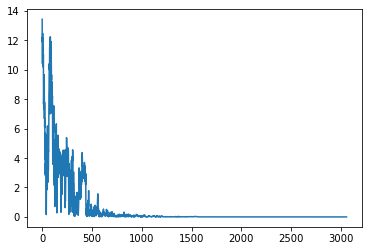

In [36]:
opt_trajectory = np.array(opt_trajectory)

f_trajectory = f(opt_trajectory[:,0], opt_trajectory[:,1])
plt.plot(np.arange(f_trajectory.size), f_trajectory)
plt.show()

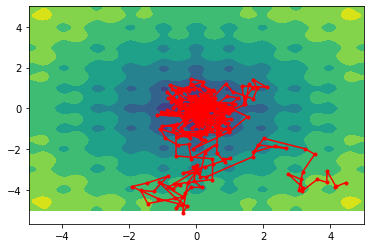

In [37]:
plt.contourf(x_base, y_base, z)
plt.plot(opt_trajectory[:,0], opt_trajectory[:,1], 'r.-')
plt.show()

In [38]:
print(opt_trajectory[-1])

[2.05460108e-06 2.17204689e-06]


### Problem 2
Consider Rastrigin Function [link](https://en.wikipedia.org/wiki/Rastrigin_function) on the interval $[-5.12; 5.12] \times [-5.12; 5.12]$:
$$f(x,y) = 20 + (x^2 - 10\cos2\pi x) + (y^2 - 10\cos2\pi y)$$
Find the global minimum value of this function using Particle Swarm Optimization with $N$ particles. Try various values of $N$. Plot the progressive steps on the contour map of the function.

In [39]:
def f(x, y):
    return 20 + (x**2 - 10*np.cos(2*np.pi*x)) + (y**2 - 10*np.cos(2*np.pi*y))

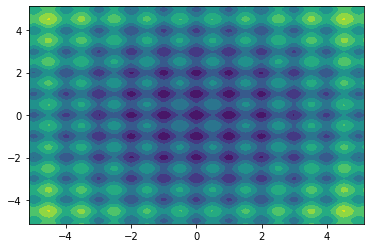

In [40]:
x_min, x_max = -5.12, 5.12
y_min, y_max = -5.12, 5.12

x_base = np.linspace(x_min, x_max, 100)
y_base = np.linspace(y_min, y_max, 100)

xx, yy = np.meshgrid(x_base, y_base, sparse=True)
z = f(xx, yy)

plt.contourf(x_base, y_base, z)
plt.show()

In [47]:
omega = 0.7298
phi = 1.49618
N = 50

9.441070793968484 [-1.08532907 -0.81202734]


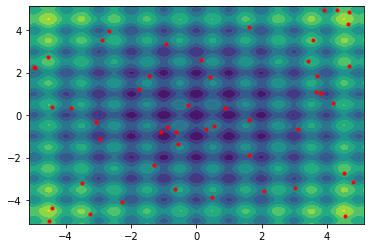

In [51]:
x = np.random.uniform(x_min, x_max, size = (N,2))
v = np.random.uniform(0, 1, size = (N,2))

f_current = f(x[:,0], x[:, 1])
f_best = f_current.copy()
x_best = x.copy()
f_g_best = np.min(f_current)
g_best = x[np.where(f_current == f_g_best)[0][0], :]

print(f_g_best, g_best)
plt.contourf(x_base, y_base, z)
plt.plot(x[:,0], x[:,1], 'r.')
plt.show()

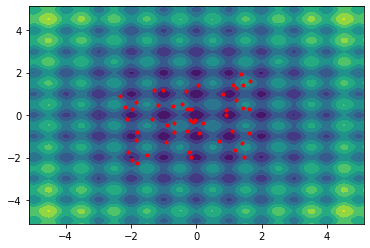

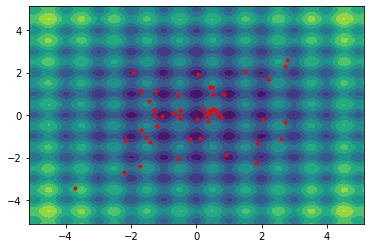

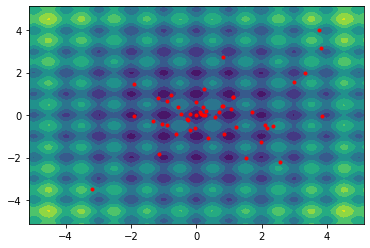

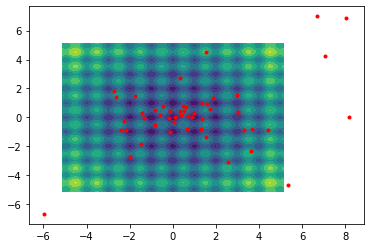

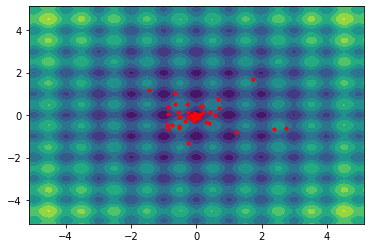

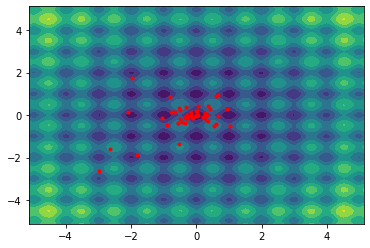

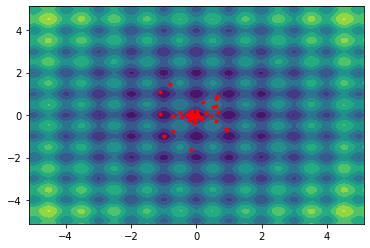

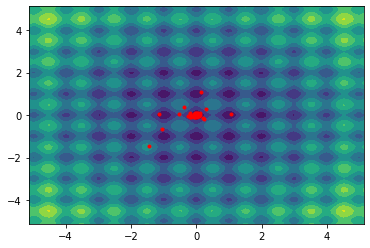

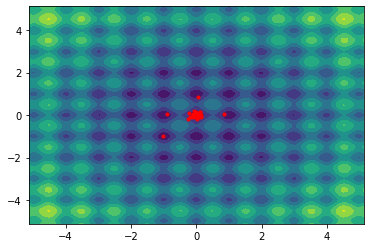

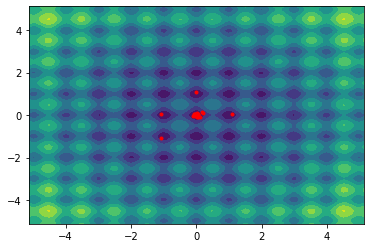

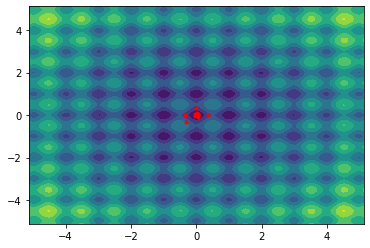

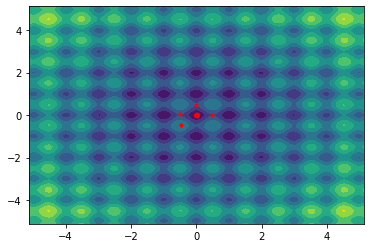

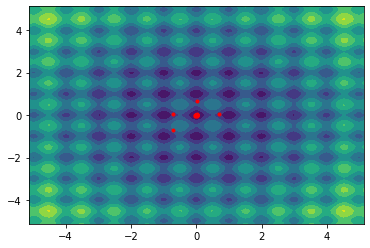

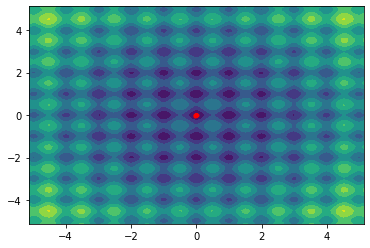

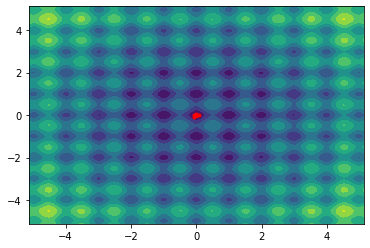

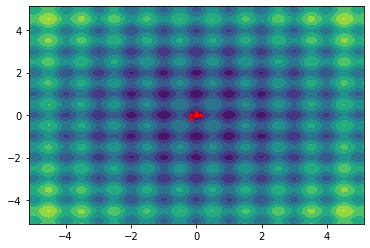

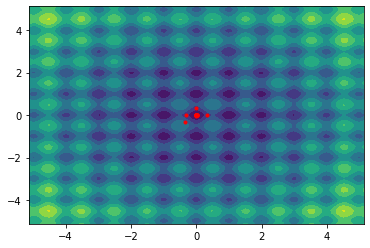

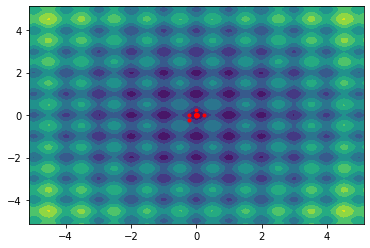

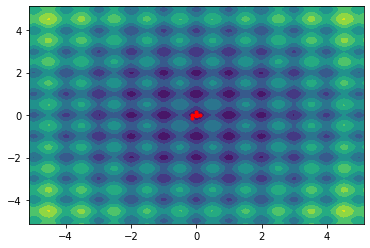

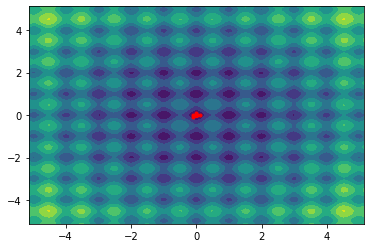

In [52]:
for i in range(100):
    v = omega*v + np.random.uniform(0, phi) * (x_best - x) + np.random.uniform(0, phi) * (g_best - x)
    x = x + v
    
    f_curr = f(x[:,0], x[:, 1])
    x_best[f_curr < f_best, :] = x[f_curr < f_best, :]
    f_best = f(x_best[:,0], x_best[:, 1])
    
    f_g_best = np.min(f_best)
    g_best = x_best[np.where(f_best == f_g_best)[0][0], :]
    
    if i % 5 == 0:
        plt.contourf(x_base, y_base, z)
        plt.plot(x[:,0], x[:,1], 'r.')
        plt.show()
    

### Problem 3
Consider Ackley or Rastrigin Function from previous problems. Find the global minimum value of this function using following methods:
 - Constricted Coefficients PSO
 - Full Information PSO

Try various values of $N$. Plot the progressive steps on the contour map of the function.